<a href="https://colab.research.google.com/github/sessihode/Florentin-AYIWAHOUN/blob/main/app_banque_credit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Importation des packages

In [1]:
#importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [3]:
#Lire la base des données
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.xls')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#2.Prétraitement des données

#Data cleaning

In [4]:
#voir le nombre des valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Autre methode pour voir le nombre des valeurs manquantes pour chaque colonne:
df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Education,0
Loan_ID,0
CoapplicantIncome,0


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
# Gérer la base des données
cat_data=[]
num_data=[]
for i, c in enumerate(df.dtypes):
  if c=='object':
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
#transformer notre liste en base de données :
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [10]:
#pour les valuers catégoriques on va utiliser la methode de la mode :
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

np.False_

In [11]:
# pour les variables numériques on va remplacer par la valeur precedente :
num_data.fillna(method='ffill', inplace=True)
num_data.isnull().sum().any()

/tmp/ipython-input-1835831048.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='ffill', inplace=True)


np.True_

#3.Transformation des données

In [12]:
# Transformer la colonne target :
target_value = {'Y': 1, 'N': 0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target=target.map(target_value)
target

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [13]:
# transformation des valeurs categoriques par des valeurs numeriques :
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [14]:
# Supprimer la colonne ID :
df.drop('Loan_ID', axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
# concatener cat_data et num_data et specifier la colonne target :
df=pd.concat([cat_data, num_data], axis=1)
y=target
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,2,5849.0,0.0,NaN,360.0,1.0
1,1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


#4.Réalisation de l'analyse exploratoire

In [16]:
target.value_counts()

,count
Loan_Status,
1,422
0,192


le pourcentage de credit accordé est 0.3127035830618892
le pourcentage de credit non accordé est 0.6872964169381107


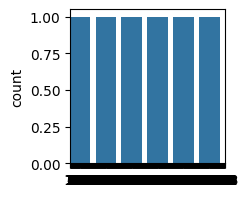

In [17]:
# commencer par la variable target :
plt.figure(figsize=(2,2))
sns.countplot(target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'le pourcentage de credit accordé est {yes}')
print(f'le pourcentage de credit non accordé est {no}')

In [18]:
#notre base de donnée:
df=pd.concat([cat_data, num_data,target], axis=1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,0,0,0,2,5849.0,0.0,NaN,360.0,1.0,1
1,1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


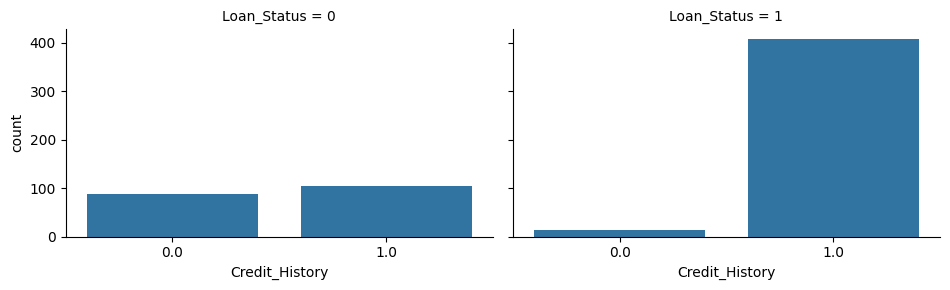

In [19]:
# credit history :
gris=sns.FacetGrid(df,col='Loan_Status',aspect=1.6)
gris.map(sns.countplot,'Credit_History')

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


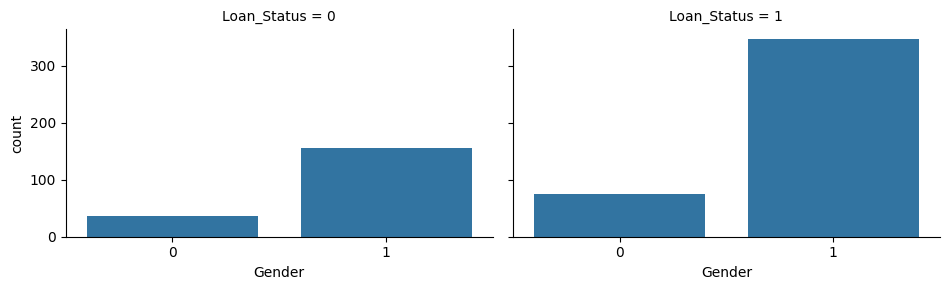

In [20]:
#Gender
gris=sns.FacetGrid(df,col='Loan_Status',aspect=1.6)
gris.map(sns.countplot,'Gender')

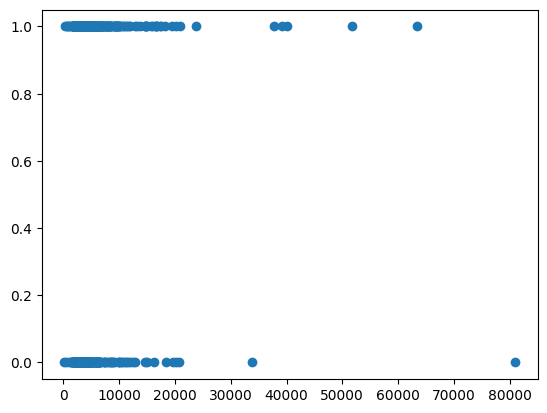

In [21]:
#Revenue de demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])


In [22]:
df.groupby('Loan_Status').median()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,,
0,302.5,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.0,360.0,1.0
1,309.5,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,126.0,360.0,1.0


#5.Réalisation du modèle :

In [23]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [24]:
# diviser la base de données en une base de données de test et de train :
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 12)
(123, 12)
(491,)
(123,)


In [25]:
# entrainement du modele:KNN :
model=KNeighborsClassifier(n_neighbors=3)
X_train = X_train.fillna(method='ffill')
y_pred=model.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred)

/tmp/ipython-input-801215387.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method='ffill')


0.6097560975609756

In [26]:
# etnrainement du modele : decision tree :
clf=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)
y_pred=clf.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred)

0.8048780487804879

In [27]:
X2=X[['Credit_History','Married','CoapplicantIncome']]
X2_train,X2_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=42)
model=KNeighborsClassifier(n_neighbors=3)
X2_train = X2_train.fillna(method='ffill')
y_pred=model.fit(X2_train,y_train).predict(X2_test)
accuracy_score(y_test,y_pred)

/tmp/ipython-input-1528202271.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X2_train = X2_train.fillna(method='ffill')


0.6097560975609756

In [28]:
clf=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)
y_pred=clf.fit(X2_train,y_train).predict(X2_test)
accuracy_score(y_test,y_pred)

0.8130081300813008

In [29]:
# Enregistrer le modele :
pickle.dump(clf, open('model.pkl', 'wb'))